In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Embedding, GlobalMaxPooling1D, Conv1D, MaxPooling1D

from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1')

In [5]:
df = df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1)

In [6]:
df.columns = ['labels' , 'data']

In [7]:
df['b_labels'] = df['labels'].map({'ham' : 0 , 'spam' : 1})

In [8]:
Y = df['b_labels'].values

In [9]:
df_train , df_test , Y_train , Y_test = train_test_split(df['data'] , Y , test_size = 0.3)

In [10]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [11]:
word_idx = tokenizer.word_index

In [12]:
V = len(word_idx)

In [13]:
data_train = pad_sequences(sequences_train)

In [14]:
T = data_train.shape[1]

In [17]:
T

189

In [15]:
data_test = pad_sequences(sequences_test , maxlen=T)

In [16]:
data_train.shape[1]

189

In [19]:
D = 20    #embedding dimensionality, can choose any number as it's a hyperparameter

M = 15   # hidden state dimensionality

# Note : We actually want the size of the embedding to (V+1)xD 
# because the first index starts from 1 and not 0
# Thus if the final index of the embedding matrix is V 
# it must have size V+1

i = Input(shape=(T,))
x = Embedding(V + 1 , D)(i)
x = Conv1D(32, 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)


model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [20]:
r = model.fit(data_train, Y_train , epochs = 10 , validation_data = (data_test , Y_test))

Epoch 1/10
122/122 [==============================] - 2s 13ms/step - loss: 0.3793 - accuracy: 0.8618 - val_loss: 0.2728 - val_accuracy: 0.8600
Epoch 2/10
122/122 [==============================] - 1s 9ms/step - loss: 0.1128 - accuracy: 0.9544 - val_loss: 0.0740 - val_accuracy: 0.9815
Epoch 3/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.1138 - val_accuracy: 0.9755
Epoch 4/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0847 - val_accuracy: 0.9797
Epoch 5/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0873 - val_accuracy: 0.9797
Epoch 6/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0925 - val_accuracy: 0.9797
Epoch 7/10
122/122 [==============================] - 1s 9ms/step - loss: 8.9568e-04 - accuracy: 0.9997 - val_loss: 0.1057 - val_accuracy: 0.9797


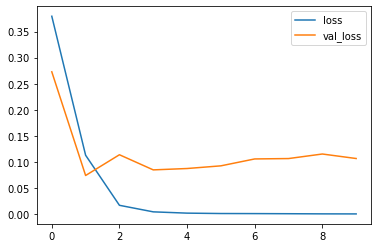

In [21]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

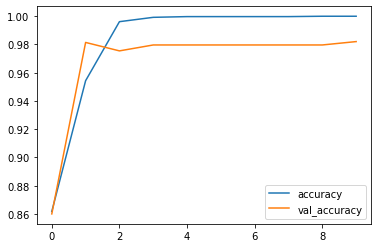

In [22]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()